In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [74]:
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

<Axes: xlabel='Month'>

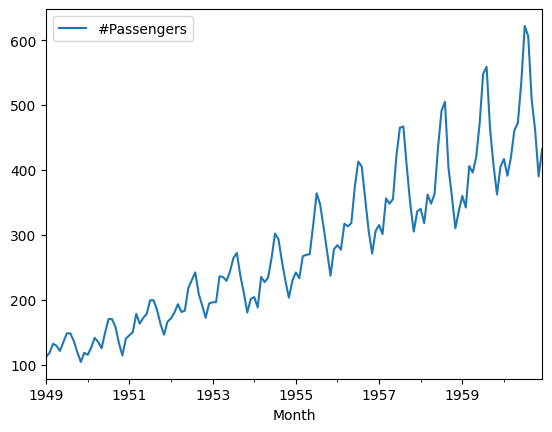

In [75]:
df.plot()

In [76]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [77]:
df['Log']=np.log(df['#Passengers'])

<Axes: xlabel='Month'>

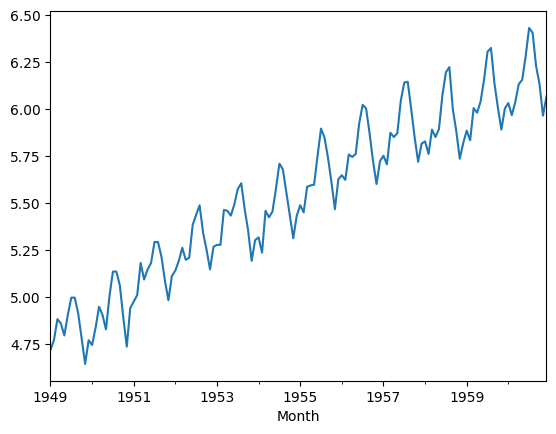

In [78]:
df['Log'].plot()

logarithm makes the amplitude to stay on the same level so we suspect it will make arima to adjust better to the data.

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [80]:
auto_arima(df['#Passengers'], seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.19 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.69 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.28 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.70 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.15 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.27 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.62 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.58 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 18 Apr 2024   AIC                           1017.847
Time:                                     10:40:16   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.600      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.883      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
train = df['#Passengers'].iloc[:-12]
test = df['#Passengers'].iloc[-12:]
len(test)

12

In [82]:
model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(0, 1, 0, 12))
result = model.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [83]:
start = len(train)
end = start + len(test) - 1
pred = result.predict(start=start, end=end).rename('SARIMA Predictions')

<Axes: xlabel='Month'>

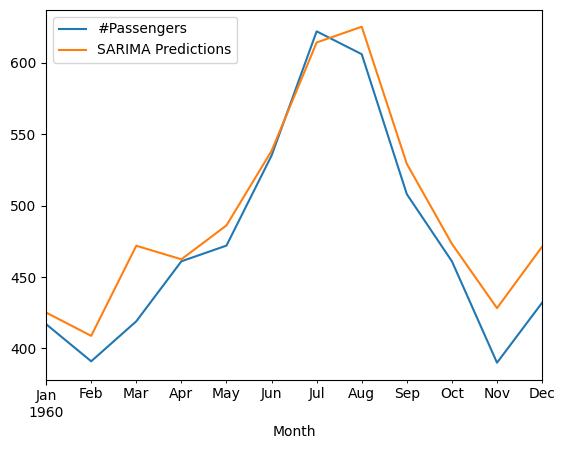

In [84]:
ax = test.plot(legend=True)
pred.plot(legend=True)

In [85]:
from sklearn.metrics import mean_absolute_percentage_error

In [86]:
mean_absolute_percentage_error(test, pred) * 100

4.431754987655488

In [87]:
auto_arima(df['Log'], seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-476.446, Time=2.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-358.005, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-472.836, Time=1.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-423.080, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-152.756, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-485.488, Time=1.75 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-455.363, Time=0.72 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-483.583, Time=3.46 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-479.077, Time=1.88 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-483.000, Time=5.25 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-486.554, Time=1.50 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-455.568, Time=0.40 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-477.430, Time=1.64 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-484.523, Time=3.04 sec
 ARIMA(1,0,2)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 249.647
Date:                              Thu, 18 Apr 2024   AIC                           -489.295
Time:                                      10:41:12   BIC                           -474.881
Sample:                                  01-01-1949   HQIC                          -483.438
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.008      2.321      0.020       0.003       0.035
ar.L1          0.5763      0.075      7.664      0.000       0.429       0.724
ar.L2          0.2620      0.084      3.127      0.002       0.098       0.426
ma.S.L12      -0.5559      0.106     -5.244      0.000      -0.764      -0.348
sigma2         0.0013      0.000      8.865      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.40
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               0.58   Skew:                             0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
train_log = df['Log'].iloc[:-12]
test_log = df['Log'].iloc[-12:]

In [89]:
model_log = SARIMAX(train_log, order=(2, 0, 0), seasonal_order=(0, 1, 1, 12))
result_log = model_log.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
start = len(train_log)
end = start + len(test_log) - 1
pred_log = result_log.predict(start=start, end=end).rename('LOG SARIMA Predictions')

<Axes: xlabel='Month'>

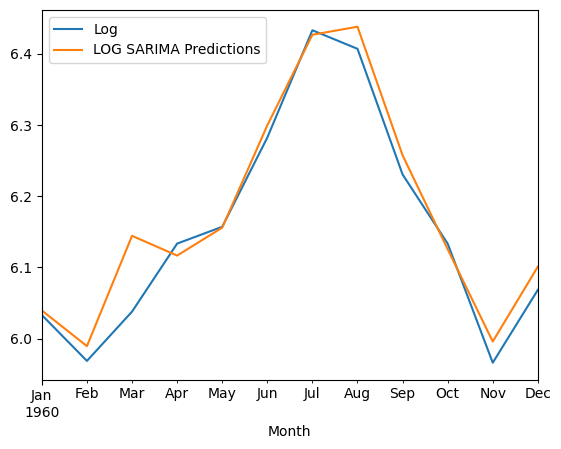

In [97]:
ax = test_log.plot(legend=True)
pred_log.plot(legend=True)

In [95]:
mean_absolute_percentage_error(test, np.exp(pred_log)) * 100

2.5925019029891665

small details make huge difference

you need to always satisfie the underlying assumptions while using the model, this is the reason while we should use cox box transformations